In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eng-sat-dataset-eda/merged.sat_Olck
/kaggle/input/eng-sat-dataset-eda/merged.eng_Latn


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import spacy

In [27]:
# Load the data
with open('/kaggle/input/eng-sat-dataset-eda/merged.eng_Latn', 'r', encoding='utf-8') as file:
    english_sentences = file.readlines()

with open('/kaggle/input/eng-sat-dataset-eda/merged.sat_Olck', 'r', encoding='utf-8') as file:
    santali_sentences = file.readlines()

In [28]:
if len(english_sentences) != len(santali_sentences):
    print("Warning: The two files do not have the same number of sentences.")


parallel_df = pd.DataFrame({'English': english_sentences, 'Santali': santali_sentences})


In [29]:
def basic_statistics(df):
    print("\nBasic Information:")
    print(f"Total sentence pairs: {len(df)}")
    print("\nSample Sentence Pairs:")
    print(df.sample(5))
    print("\nDescription:")
    print(df.describe())

# Run basic statistics
basic_statistics(parallel_df)


Basic Information:
Total sentence pairs: 129358

Sample Sentence Pairs:
                                                  English  \
93533   So far, the optimism can make your essay-writi...   
28572   After you've domesticated your LLC, you'll sti...   
72727   Do not brown the garlic, as it will become bit...   
100119  Official definition of the United States Depar...   
36931   Remember to send all notices by certified mail...   

                                                  Santali  
93533      ᱟᱵᱚ ᱟᱯᱱᱟᱨᱟᱜ ᱦᱚᱲᱢᱚ ᱱᱟᱯᱟᱭ ᱵᱚᱱ ᱫᱚᱦᱚ ᱫᱟᱲᱮᱭᱟᱜᱼᱟ ᱾\n  
28572   ᱟᱢᱟᱜ ᱮᱞ ᱮᱞ ᱥᱤ ᱛᱷᱟᱹᱭᱟᱱ ᱠᱚᱨᱟᱣ ᱛᱟᱭᱚᱢ ᱱᱟᱶᱟ ᱴᱷᱟᱶᱨᱮ ...  
72727                     ᱵᱟᱝ ᱢᱟᱞᱚᱴᱚᱜ ᱟᱫᱚ ᱛᱟᱦᱮᱸᱱ ᱥᱟᱠᱟᱢ᱾\n  
100119   ᱩᱭᱤᱴᱱᱮᱥ ᱴᱩ ᱢᱟᱤ ᱞᱟᱭᱤᱯᱷ ᱠᱳᱣᱟᱭᱤᱴ ᱢᱳᱢᱮᱱᱴ ᱤᱱ ᱮ ᱚᱣᱟᱨ\n  
36931   ᱫᱤᱥᱟᱹ ᱠᱟᱛᱮ ᱱᱚᱠᱚᱞ ᱰᱟᱠᱡᱚᱜ ᱟᱨ ᱨᱩᱣᱟᱹᱲ ᱨᱩᱥᱤᱫ ᱟᱨᱫᱟᱥ ...  

Description:
                                                  English  \
count                                              129358   
unique                                             103382   
top

In [30]:
# Calculate sentence lengths for each language
parallel_df['English_Length'] = parallel_df['English'].apply(lambda x: len(x.split()))
parallel_df['Santali_Length'] = parallel_df['Santali'].apply(lambda x: len(x.split()))

In [31]:
# Show sentence length statistics
def sentence_length_statistics(df):
    print("\nSentence Length Statistics:")
    print("Average length of English sentences:", df['English_Length'].mean())
    print("Average length of Santali sentences:", df['Santali_Length'].mean())
    print("\nSample Sentence Lengths:")
    print(df[['English_Length', 'Santali_Length']].sample(5))

# Run sentence length statistics
sentence_length_statistics(parallel_df)


Sentence Length Statistics:
Average length of English sentences: 11.681898297747336
Average length of Santali sentences: 11.6242134232131

Sample Sentence Lengths:
        English_Length  Santali_Length
128596               4               7
120005               5               4
33933                8               9
5880                23              30
78404                6               5


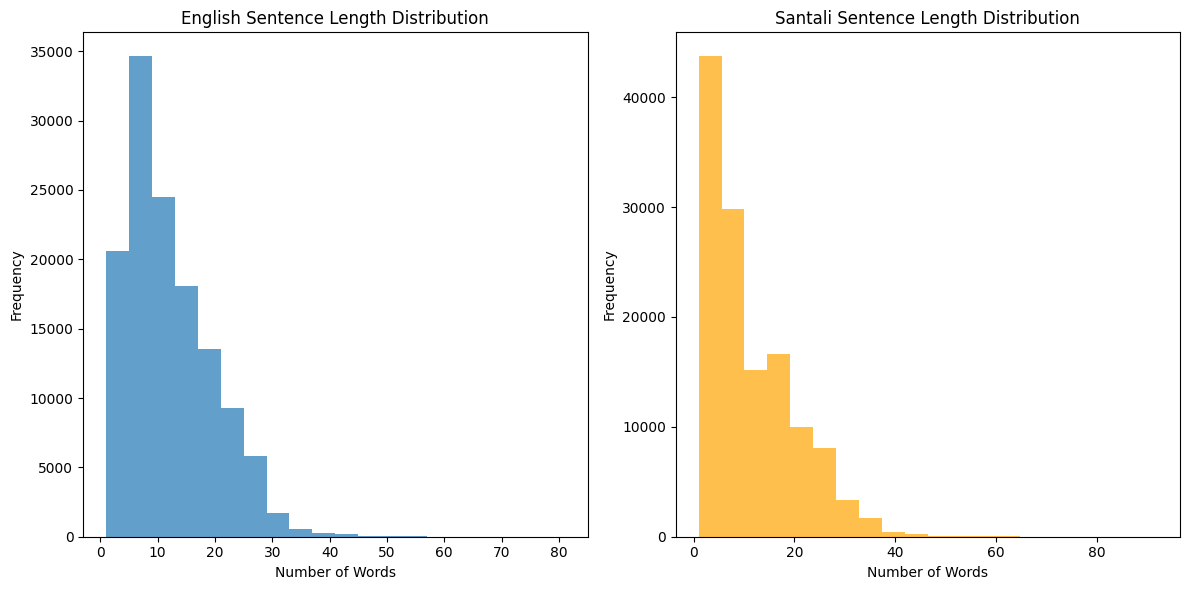

In [32]:
# Plot the distribution of sentence lengths
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(parallel_df['English_Length'], bins=20, alpha=0.7, label='English')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('English Sentence Length Distribution')

plt.subplot(1, 2, 2)
plt.hist(parallel_df['Santali_Length'], bins=20, alpha=0.7, color='orange', label='Santali')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Santali Sentence Length Distribution')

plt.tight_layout()
plt.show()


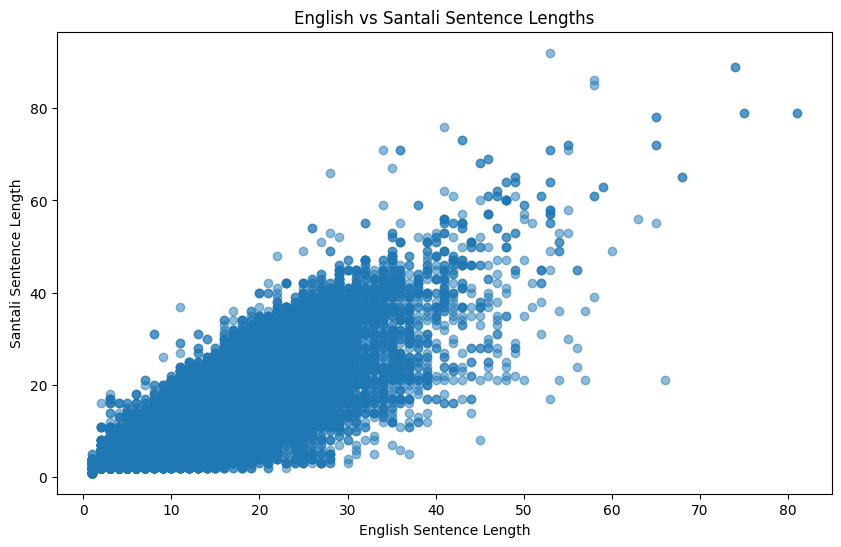

In [33]:
# Scatter plot of English vs Santali sentence lengths
plt.figure(figsize=(10, 6))
plt.scatter(parallel_df['English_Length'], parallel_df['Santali_Length'], alpha=0.5)
plt.xlabel('English Sentence Length')
plt.ylabel('Santali Sentence Length')
plt.title('English vs Santali Sentence Lengths')
plt.show()

In [34]:
parallel_df['Length_Difference'] = parallel_df['English_Length'] - parallel_df['Santali_Length']

# Display statistics on length differences
def length_difference_statistics(df):
    print("\nSentence Length Difference Statistics:")
    print(df['Length_Difference'].describe())
    print("\nSample Length Differences:")
    print(df[['English_Length', 'Santali_Length', 'Length_Difference']].sample(5))

# Run length difference statistics
length_difference_statistics(parallel_df)


Sentence Length Difference Statistics:
count    129358.000000
mean          0.057685
std           4.069246
min         -39.000000
25%          -2.000000
50%           0.000000
75%           2.000000
max          45.000000
Name: Length_Difference, dtype: float64

Sample Length Differences:
        English_Length  Santali_Length  Length_Difference
109094               6               6                  0
70366               11              10                  1
108478              28              17                 11
1393                22              23                 -1
84233                5               3                  2


In [35]:
# Check for any possible missing or empty translations
def check_empty_translations(df):
    empty_english = df['English'].apply(lambda x: x.strip() == '').sum()
    empty_santali = df['Santali'].apply(lambda x: x.strip() == '').sum()
    print("\nMissing/Empty Translations:")
    print(f"Number of empty English sentences: {empty_english}")
    print(f"Number of empty Santali sentences: {empty_santali}")

# Run check for empty translations
check_empty_translations(parallel_df)


Missing/Empty Translations:
Number of empty English sentences: 0
Number of empty Santali sentences: 0


In [36]:
# Check for the presence of emojis
def contains_emoji(text):
    emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+")
    return bool(emoji_pattern.search(text))

parallel_df['English_Has_Emoji'] = parallel_df['English'].apply(contains_emoji)
parallel_df['Santali_Has_Emoji'] = parallel_df['Santali'].apply(contains_emoji)

# Display statistics on the presence of emojis
def emoji_statistics(df):
    english_emoji_count = df['English_Has_Emoji'].sum()
    santali_emoji_count = df['Santali_Has_Emoji'].sum()
    print("\nEmoji Presence Statistics:")
    print(f"Number of English sentences with emojis: {english_emoji_count}")
    print(f"Number of Santali sentences with emojis: {santali_emoji_count}")

# Run emoji statistics
emoji_statistics(parallel_df)


Emoji Presence Statistics:
Number of English sentences with emojis: 170
Number of Santali sentences with emojis: 206


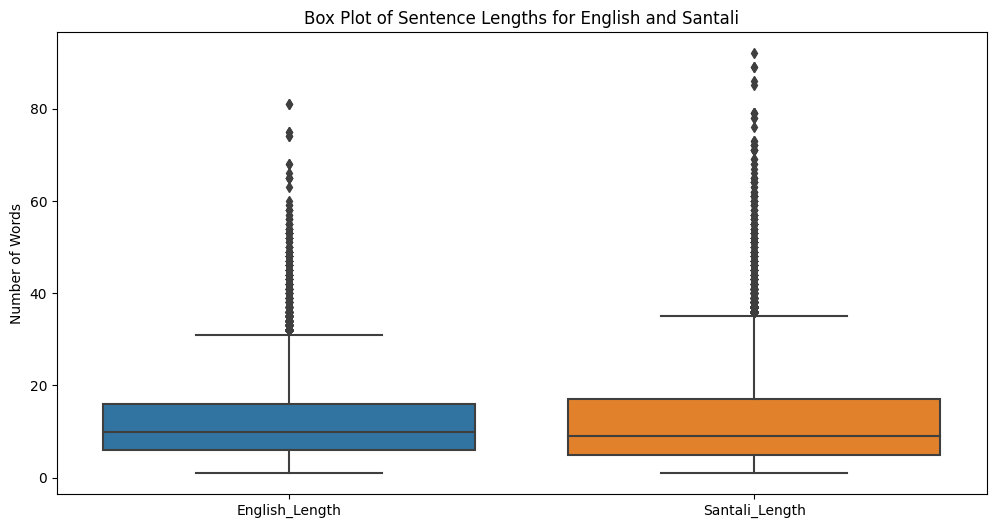

In [37]:
# Visualize the difference in sentence lengths using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=parallel_df[['English_Length', 'Santali_Length']])
plt.title('Box Plot of Sentence Lengths for English and Santali')
plt.ylabel('Number of Words')
plt.show()

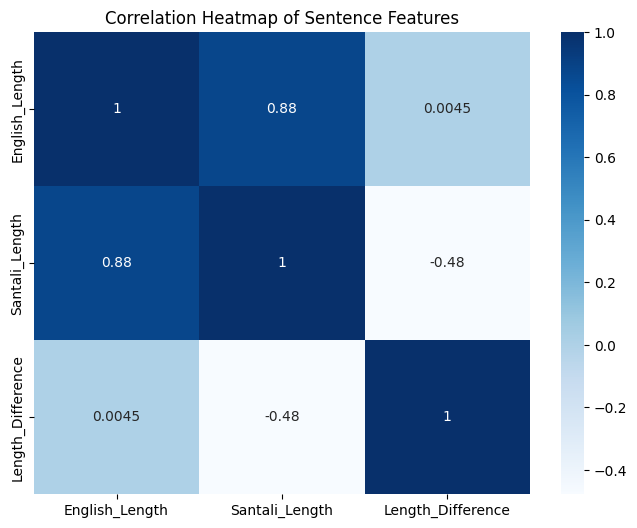

In [38]:
# Heatmap to visualize correlations between different features
plt.figure(figsize=(8, 6))
sns.heatmap(parallel_df[['English_Length', 'Santali_Length', 'Length_Difference']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Sentence Features')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


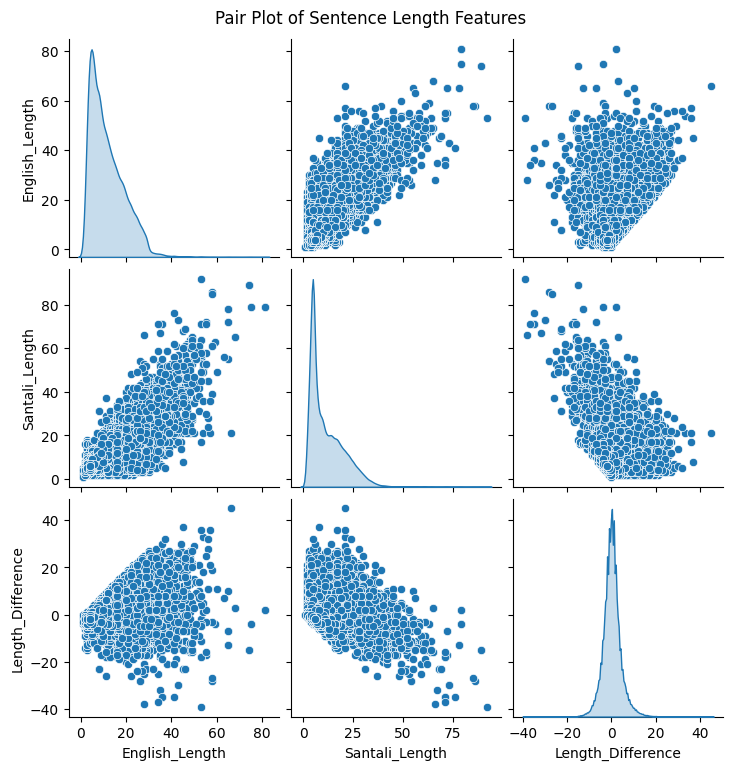

In [39]:
# Pairplot to visualize relationships and distributions
sns.pairplot(parallel_df[['English_Length', 'Santali_Length', 'Length_Difference']], diag_kind='kde')
plt.suptitle('Pair Plot of Sentence Length Features', y=1.02)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


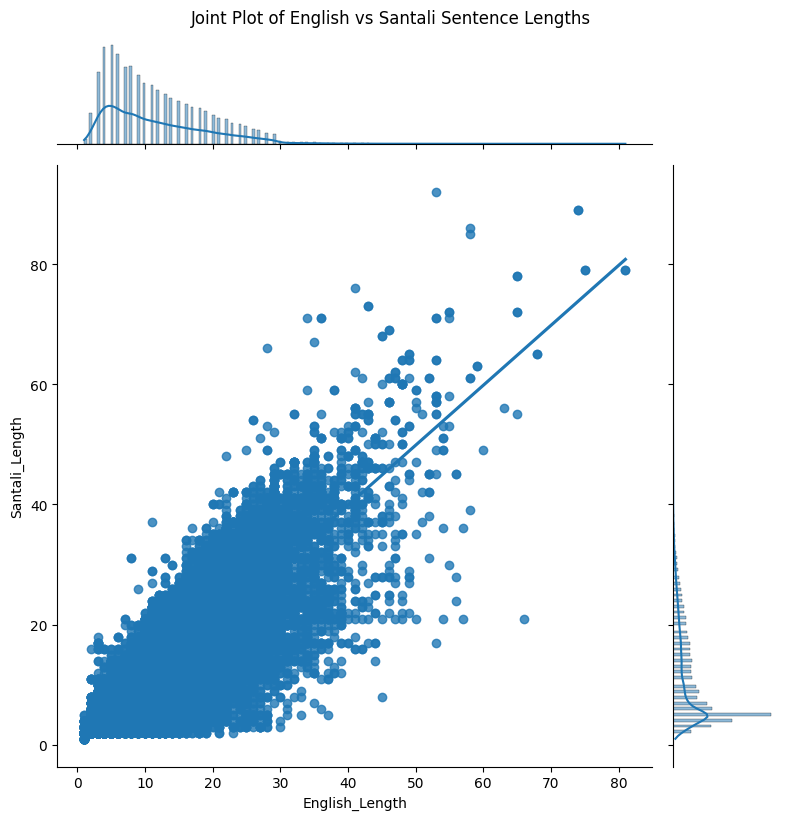

In [40]:
# Jointplot to see the relationship between English and Santali sentence lengths
sns.jointplot(x='English_Length', y='Santali_Length', data=parallel_df, kind='reg', height=8, ratio=5)
plt.suptitle('Joint Plot of English vs Santali Sentence Lengths', y=1.02)
plt.show()


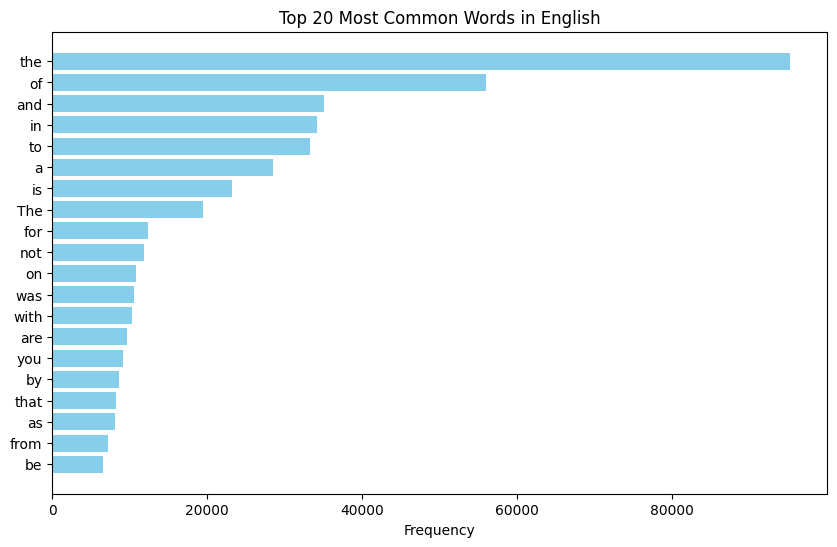

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 7294 (\N{OL CHIKI PUNCTUATION MUCAAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 7272 (\N{OL CHIKI LETTER IR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 7278 (\N{OL CHIKI LETTER LE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 7263 (\N{OL CHIKI LETTER LAA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 7275 (\N{OL CHIKI LETTER UD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/

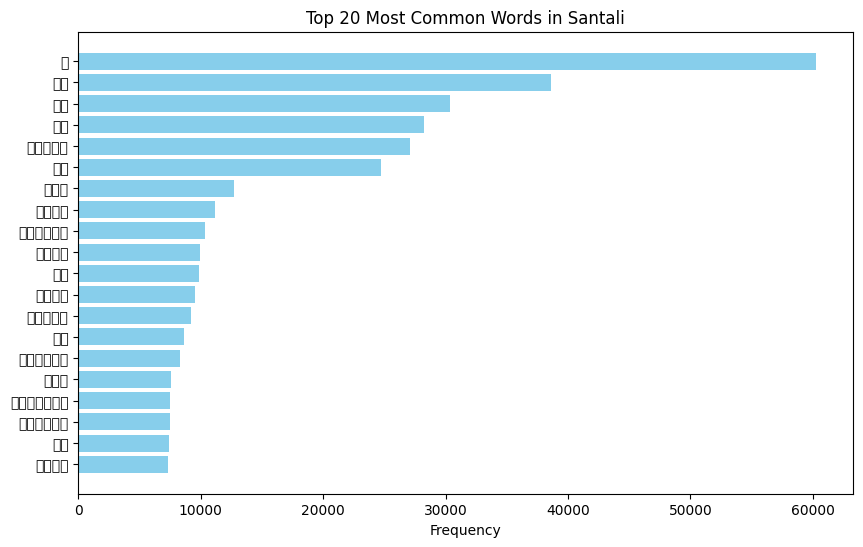

In [41]:
# Analyze the most common words in both English and Santali
def plot_word_frequencies(sentences, title, top_n=20):
    words = ' '.join(sentences).split()
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(top_n)

    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Top {top_n} Most Common Words in {title}')
    plt.gca().invert_yaxis()
    plt.show()

plot_word_frequencies(parallel_df['English'], 'English')
plot_word_frequencies(parallel_df['Santali'], 'Santali')

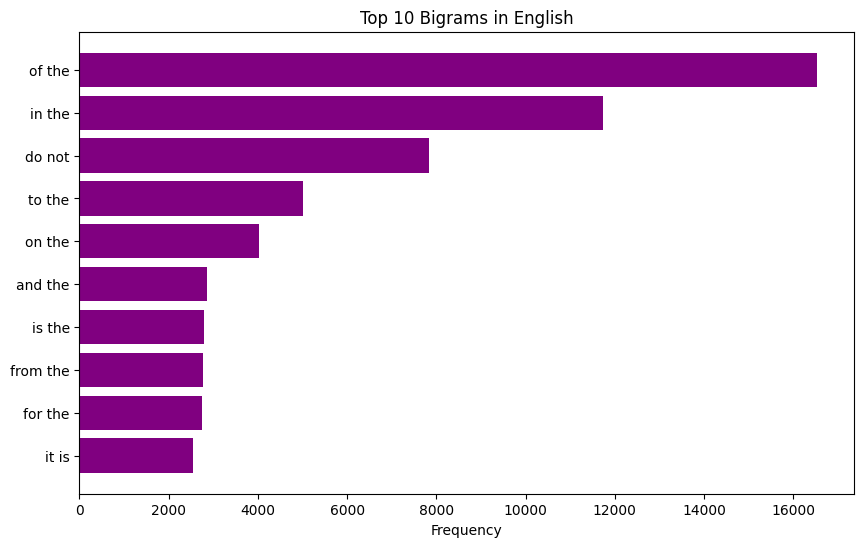

In [42]:
# Perform n-gram (bigrams) analysis to understand commonly co-occurring words
vectorizer = CountVectorizer(ngram_range=(2, 2)).fit(parallel_df['English'])
ngrams = vectorizer.transform(parallel_df['English'])
sum_ngrams = ngrams.sum(axis=0)
ngram_freq = [(word, sum_ngrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:10]

ngram_labels, ngram_counts = zip(*ngram_freq)
plt.figure(figsize=(10, 6))
plt.barh(ngram_labels, ngram_counts, color='purple')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams in English')
plt.gca().invert_yaxis()
plt.show()

In [43]:
# Highlight potential misalignments by identifying sentence pairs with extremely different lengths
potential_misaligned = parallel_df[(parallel_df['Length_Difference'].abs() > 15)]
print("\nPotential Misaligned Sentence Pairs (Length Difference > 15):")
print(potential_misaligned[['English', 'Santali', 'Length_Difference']].head(10))


Potential Misaligned Sentence Pairs (Length Difference > 15):
                                                English  \
3074        Kabaddi is the state sport of Tamil Nadu.\n   
4601  In his later career, Kumar was also heavily in...   
5020  The couple had three sons, Vishwasrao who died...   
5122  In order to gain the love of his Hindu wives a...   
5235  It is known that Paramardi did not die or reti...   
5408  Haasan's films during the 1980s included the 1...   
5436  On 8 November 2019, his book 'Swami and Friend...   
5827  Haasan's next film was 2001's Aalavandhan, in ...   
5952  He initiated reforms that withdrew the tax exe...   
5977  However, they still starved because they were ...   

                                                Santali  Length_Difference  
3074  ᱠᱚᱵᱟᱰᱤ ᱛᱟᱢᱤᱞᱱᱟᱰᱩ ᱨᱮᱱᱟᱜ ᱯᱚᱱᱯᱛ ᱠᱷᱮᱞᱚᱸᱰ ᱠᱟᱱᱟ ᱾ ᱵᱷ...                -23  
4601  ᱚᱱᱟ ᱛᱟᱭᱚᱢ ᱦᱟᱴᱤᱧ ᱡᱤᱭᱚᱱ ᱨᱮ , ᱠᱩᱢᱟᱨ ᱜᱟᱭᱱᱟᱦᱟᱨ ᱟᱦᱚᱢ...                -30  
5020  ᱱᱩᱠᱤᱱ ᱡᱩᱨᱤᱼᱯᱟᱹᱨᱤ ᱨᱮᱱ ᱯᱮᱭᱟ ᱠᱚᱲᱟ ᱠᱚ ᱛᱟᱸᱦᱮ ᱠᱟᱱᱟ, ... 

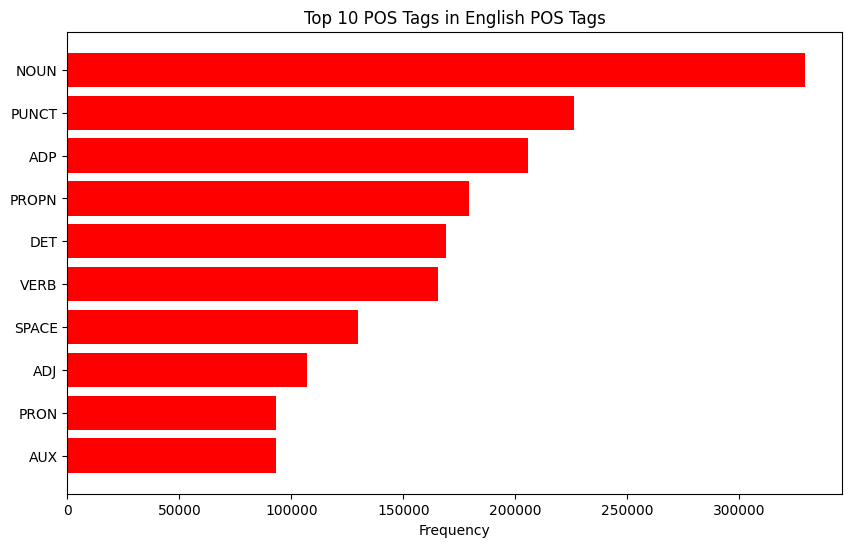

In [44]:
# Part of Speech (POS) Tagging Analysis for English
nlp = spacy.load("en_core_web_sm")

def pos_tagging_analysis(sentences, title, top_n=10):
    pos_counts = Counter()
    for sent in sentences:
        doc = nlp(sent)
        pos_counts.update([token.pos_ for token in doc])

    most_common_pos = pos_counts.most_common(top_n)
    pos_labels, pos_freq = zip(*most_common_pos)

    plt.figure(figsize=(10, 6))
    plt.barh(pos_labels, pos_freq, color='red')
    plt.xlabel('Frequency')
    plt.title(f'Top {top_n} POS Tags in {title}')
    plt.gca().invert_yaxis()
    plt.show()

pos_tagging_analysis(parallel_df['English'], 'English POS Tags')

In [45]:
# Vocabulary Coverage
# Calculate the total vocabulary size of both datasets and compare them
english_vocab = set(' '.join(parallel_df['English']).split())
santali_vocab = set(' '.join(parallel_df['Santali']).split())

print("\nVocabulary Size:")
print(f"English Vocabulary Size: {len(english_vocab)}")
print(f"Santali Vocabulary Size: {len(santali_vocab)}")


Vocabulary Size:
English Vocabulary Size: 120159
Santali Vocabulary Size: 80992


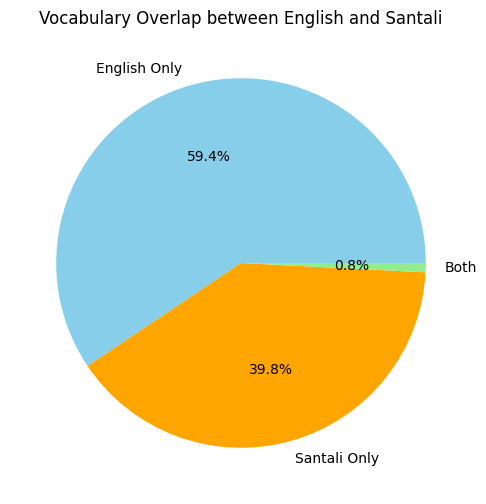

In [46]:
# Visualize Vocabulary Overlap
overlap = len(english_vocab.intersection(santali_vocab))
labels = ['English Only', 'Santali Only', 'Both']
sizes = [len(english_vocab) - overlap, len(santali_vocab) - overlap, overlap]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Vocabulary Overlap between English and Santali')
plt.show()